(2467,) (2467,)


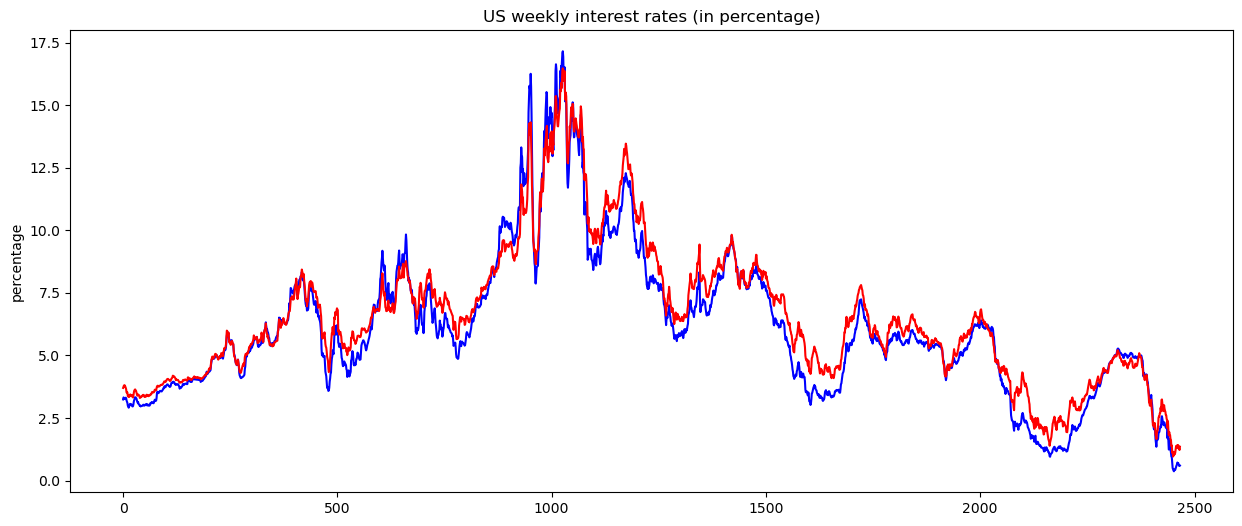

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hay que leerlos así porque este txt en concreto hace cosas raras con el pd.read_csv de Python
r1 = []
with open("w-gs1yr.txt") as f:
    lines = f.read()
    for line in lines.split("\n"):
        r1.append((line.split(" ")[-1]))
        
name = r1[0]
r1 = pd.Series(r1[1:-1], name = name)
r1 = r1.astype(float)

r3 = []
with open("w-gs3yr.txt") as f:
    lines = f.read()
    for line in lines.split("\n"):
        r3.append((line.split(" ")[-1]))
        
name = r3[0]
r3 = pd.Series(r3[1:-1], name = name)
r3 = r3.astype(float)

print(np.shape(r1), np.shape(r3)) # Coincide con lo de R
# Estos parámetros controlan lo grande que es el gráfico
size = (15,6)
plt.figure(figsize = size)
plt.plot(r1, 'b')
plt.plot(r3, 'r')
plt.ylabel('percentage')
plt.title("US weekly interest rates (in percentage)")
plt.show()

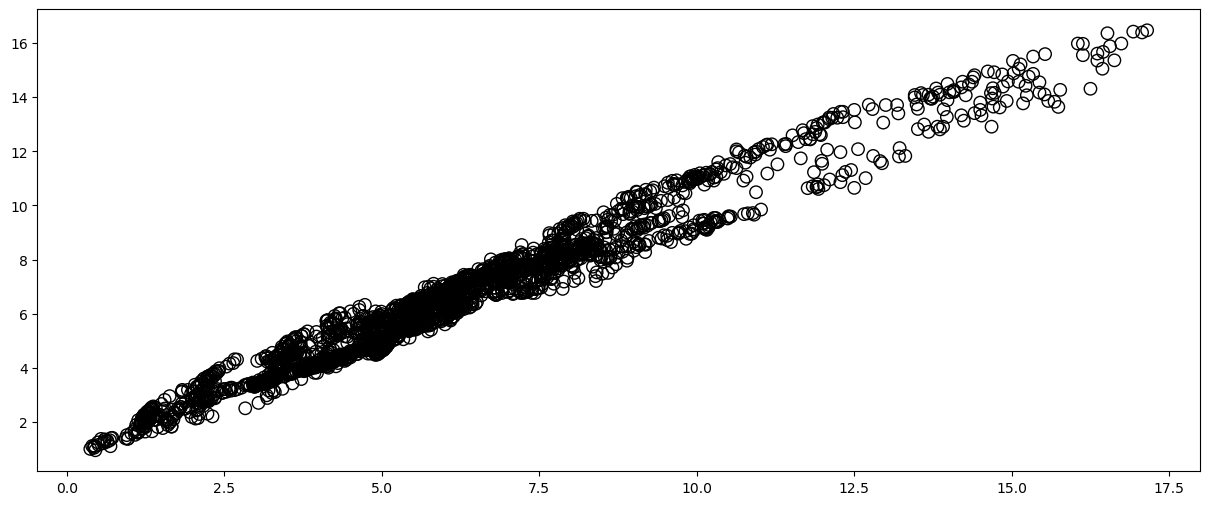

In [2]:
plt.figure(figsize = size)
plt.scatter(r1, r3, s=80, facecolors='none', edgecolors='k')

In [3]:
print('Coeficiente de correlación:', np.corrcoef(r1,r3)[0,1]) # Coincide

Coeficiente de correlación: 0.9823052215987739


In [4]:
import statsmodels.api as sm

# Hay que convertirlo en un dataframe y añadirle una constante
r1 = sm.add_constant(pd.DataFrame(r1))

# Los coeficientes de la regresión coinciden
m1 = sm.OLS(r3, r1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 6.781e+04
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:09:37   Log-Likelihood:                -1899.6
No. Observations:                2467   AIC:                             3803.
Df Residuals:                    2465   BIC:                             3815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8321      0.024     34.432      0.000       0.785       0.880
rate           0.9295      0.004    260.404      0.000       0.923       0.937
==============================================================================
Omnibus:                       10.775   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.257
Skew:                           0.020   Prob(JB):                       0.0161
Kurtosis:                       2.720   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

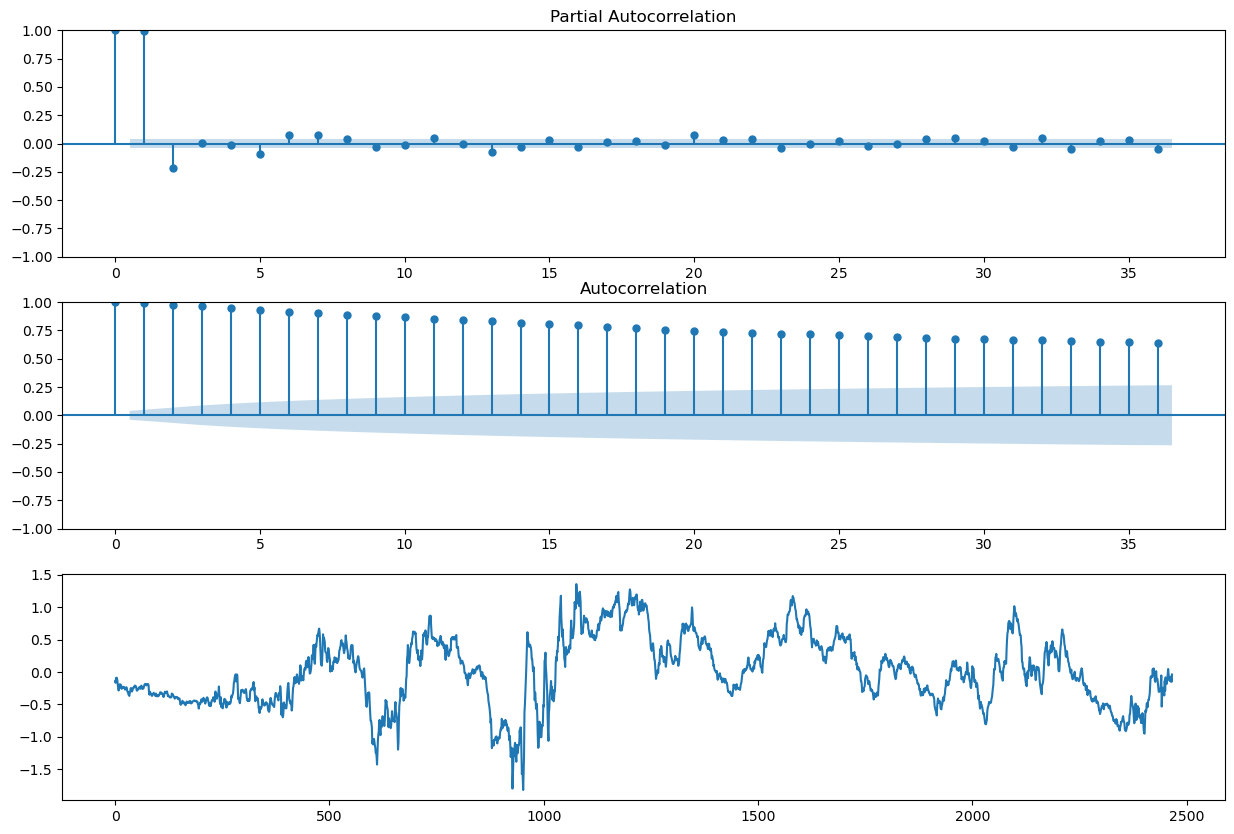

In [5]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nlags = 36 # play with this parameter

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(m1.resid, lags = nlags, method="ols", ax=ax[0])
plot_acf(m1.resid, lags = nlags, ax=ax[1])
ax[2] = plt.plot(m1.resid)
plt.show()



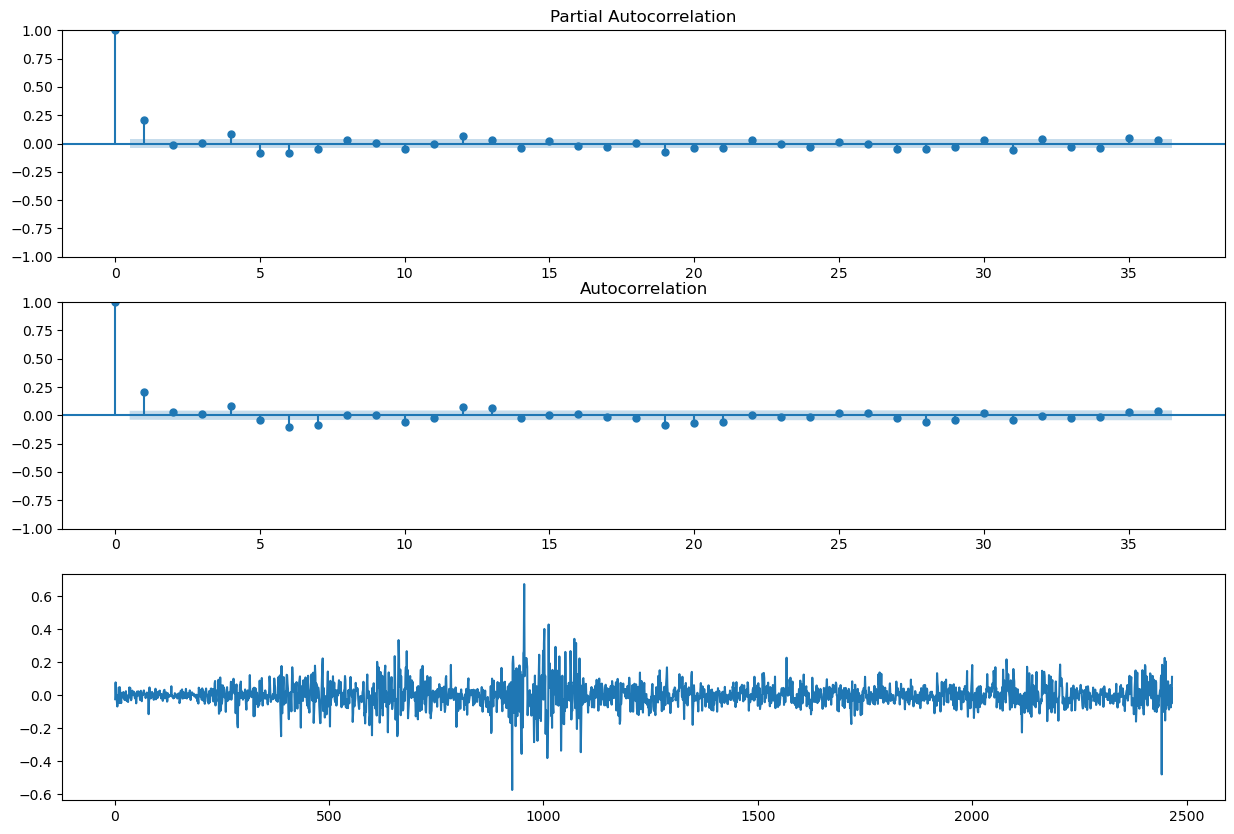

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nlags = 36 # play with this parameter

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(m1.resid.diff().dropna(), lags = nlags, method="ols", ax=ax[0])
plot_acf(m1.resid.diff().dropna(), lags = nlags, ax=ax[1])
ax[2] = plt.plot(m1.resid.diff().dropna())
plt.show()

In [7]:
c1 = r1.iloc[:,-1].diff().dropna()
c3 = r3.diff().dropna()

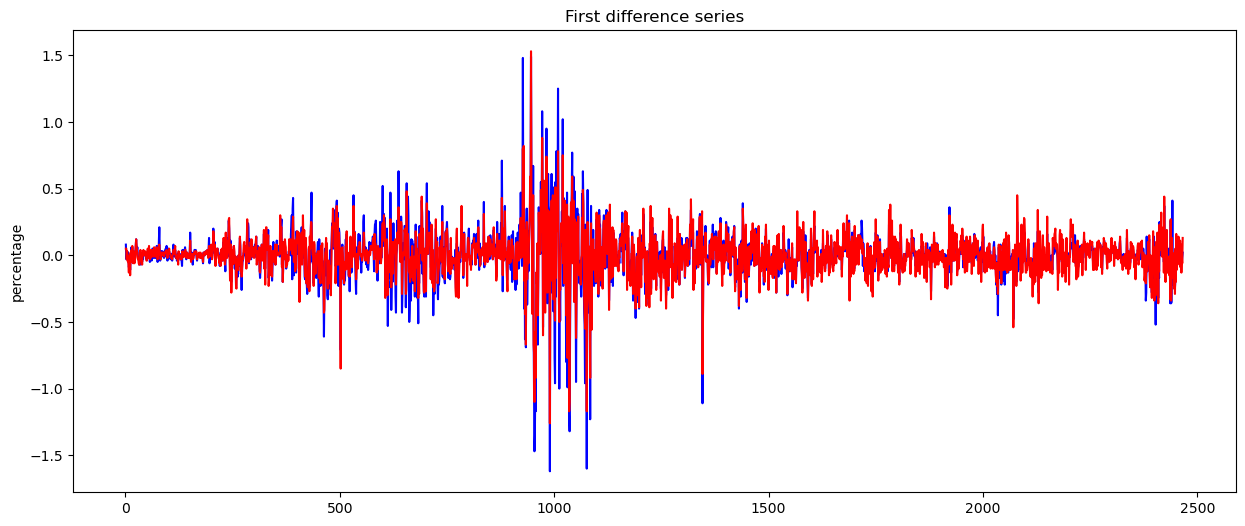

In [8]:
plt.figure(figsize = size)
plt.plot(c1, 'b')
plt.plot(c3, 'r')
plt.ylabel('percentage')
plt.title("First difference series")
plt.show()

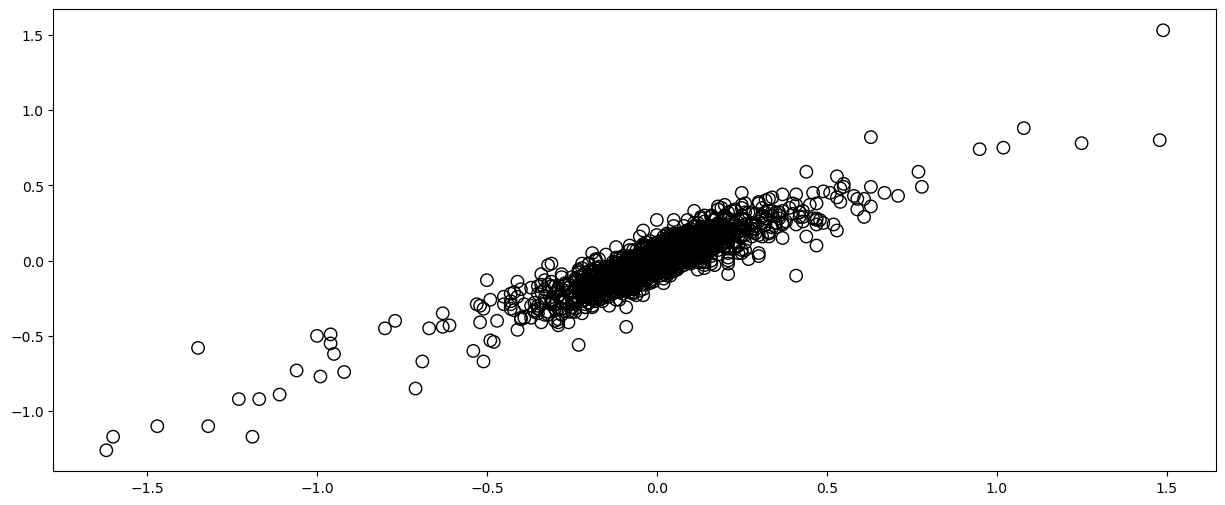

In [9]:
plt.figure(figsize = size)
plt.scatter(c1, c3, s=80, facecolors='none', edgecolors='k')

In [10]:
# Coincide con R
print('Coeficiente de correlación:', np.corrcoef(c1,c3)[0,1])

Coeficiente de correlación: 0.9084847164886661


In [11]:
import statsmodels.api as sm
# Si no le añadimos explícitamente la constante, statsmodels por defecto no te la pone. Coincide con R
m2 = sm.OLS(c3, c1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rate   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                          1.165e+04
Date:                Mon, 20 Feb 2023   Prob (F-statistic):                        0.00
Time:                        16:09:39   Log-Likelihood:                          3096.0
No. Observations:                2466   AIC:                                     -6190.
Df Residuals:                    2465   BIC:                                     -6184.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rate           0.7919      0.007    107.930      0.000       0.778       0.806
==============================================================================
Omnibus:                      233.811   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1644.653
Skew:                           0.070   Prob(JB):                         0.00
Kurtosis:                       6.998   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

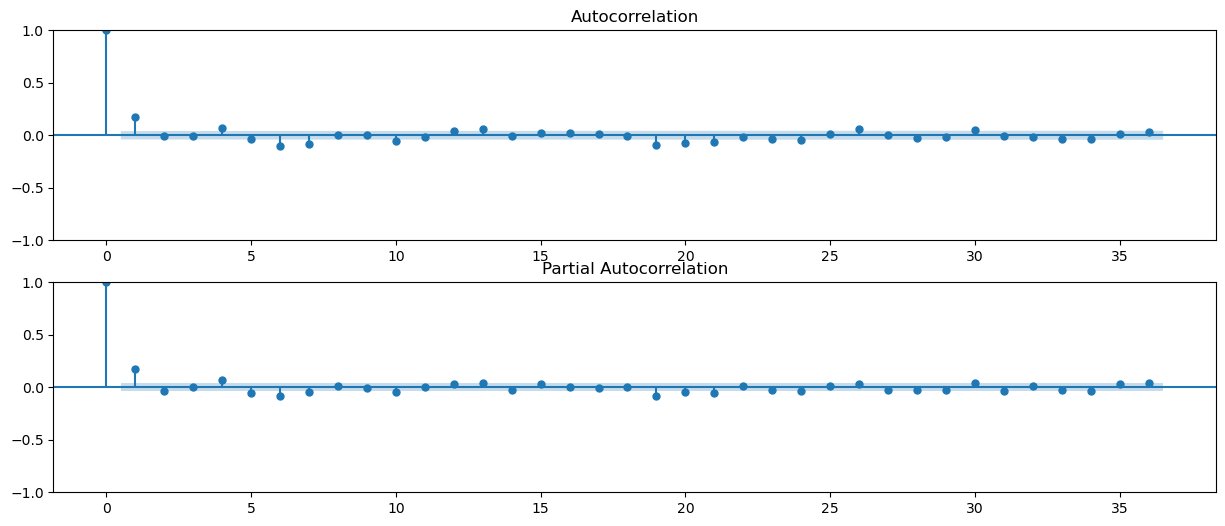

In [12]:
fig, ax = plt.subplots(2,1, figsize = (15,6))

plot_acf(m2.resid, lags = nlags, ax=ax[0])
plot_pacf(m2.resid, lags = nlags, method="ols", ax=ax[1])
plt.show()

In [13]:
m3 = sm.tsa.arima.ARIMA(endog = c3, exog = c1, order = (0, 0 , 7), trend = 'n').fit() # Sin incluir constante
# m3 = sm.tsa.arima.ARIMA(endog = c3, exog = c1, order = (0, 0 , 0)).fit() # Incluyendo constante

m3.summary()

# Varía aquí en R que el sigma es 0.0048 y en R es 0.0073. El coeficiente de rate es el mismo

c:\Users\MMirogranada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMirogranada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\MMirogranada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   rate   No. Observations:                 2466
Model:                 ARIMA(0, 0, 7)   Log Likelihood                3156.253
Date:                Mon, 20 Feb 2023   AIC                          -6294.507
Time:                        16:09:41   BIC                          -6242.214
Sample:                             0   HQIC                         -6275.509
                               - 2466                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rate           0.7969      0.004    217.535      0.000       0.790       0.804
ma.L1          0.1795      0.014     13.019      0.000       0.152       0.207
ma.L2          0.0035      0.014      0.244      0.808      -0.025       0.032
ma.L3         -0.0153      0.016     -0.984      0.325      -0.046       0.015
ma.L4          0.0640      0.016      3.914      0.000       0.032       0.096
ma.L5         -0.0241      0.016     -1.466      0.143      -0.056       0.008
ma.L6         -0.0729      0.015     -4.774      0.000      -0.103      -0.043
ma.L7         -0.0748      0.015     -4.981      0.000      -0.104      -0.045
sigma2         0.0045   7.89e-05     57.367      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1653.50
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.12
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
box_test = sm.stats.acorr_ljungbox(m3.resid, lags=[15])
print("X_squraed:", box_test.iloc[0,0]) # Coincide con R
print("p-value:", box_test.iloc[0,1]) # En R es e -16

X_squraed: 19.35875275300875
p-value: 0.19793478827937858


El método para usar en la PACF puede ser uno de los siguientes, creo que es igual al de R (he visto que usa el algoritmo de Durbin, pero si quieres usar alguno de los otros, aquí están como llamarlos, solo hay que cambiar las letras de mehod por una de las siguientes:


- **“yw”** or “ywadjusted” : Yule-Walker with sample-size adjustment in denominator for acovf. Default.

- **“ywm”** or “ywmle” : Yule-Walker without adjustment.

- **“ols”** : regression of time series on lags of it and on constant.

- **“ols-inefficient”** : regression of time series on lags using a single common sample to estimate all pacf coefficients.

- **“ols-adjusted”** : regression of time series on lags with a bias adjustment.

- **“ld”** or “ldadjusted” : Levinson-Durbin recursion with bias correction.

- **“ldb"** or “ldbiased” : Levinson-Durbin recursion without bias correction.

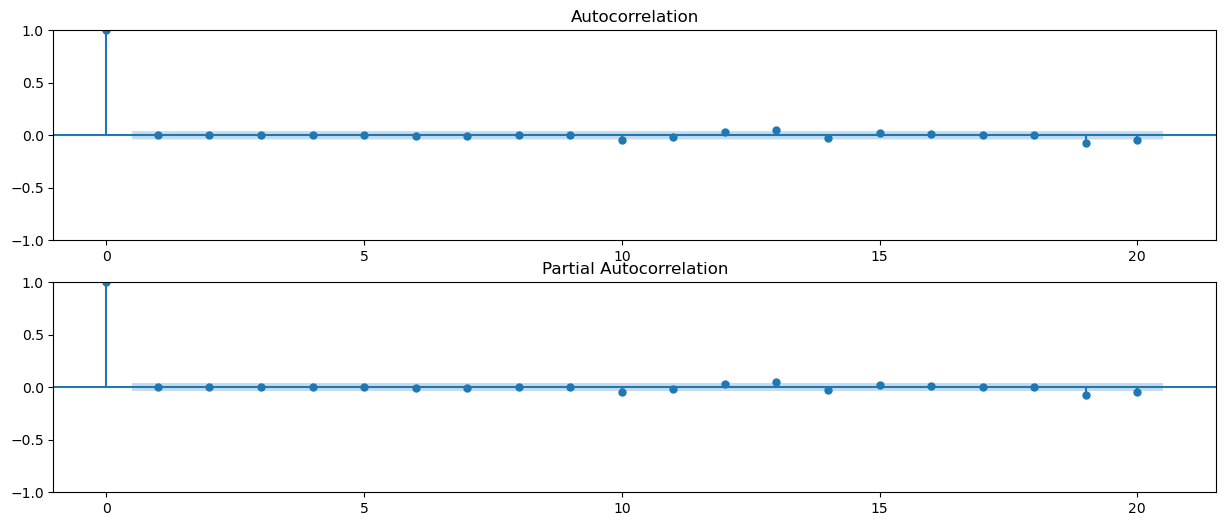

In [15]:
fig, ax = plt.subplots(2,1, figsize = (15,6))

# La PACF al principio creía que estaba mal, pero R obvia la PACF 0 y aquí se incluye, por lo que hay que empezar a leer
# desde la segunda para ver la relación con la de R

plot_acf(m3.resid, lags = 20, ax=ax[0])
plot_pacf(m3.resid, lags = 20, method = 'ld', ax=ax[1])
plt.show()